## DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. 

## Importing Pandas

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import re # regular expressions
import seaborn as sns
sns.set()
pd.__version__


'1.0.1'

### The Pandas Series Object
Pandas Series a bit like a specialization of a Python dictionary

In [9]:
# pandas object has explicit index column
# where numpy has it numeric implicitly 
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [10]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [11]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
print(data[1])
print(data[1:3])

0.5
1    0.50
2    0.75
dtype: float64


In [15]:
## with different index
# We can even use noncontiguous or nonsequential indices also
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [17]:
data['b']

0.5

### Pandas as Dictionary

In [18]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

population = pd.Series(population_dict)
population
# By default, a Series will be created where the index is drawn from the sorted keys

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
population['California']


38332521

In [20]:
population['California':'Illinois']


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### The Pandas DataFrame Object


In [23]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area_dict

{'California': 423967,
 'Texas': 695662,
 'New York': 141297,
 'Florida': 170312,
 'Illinois': 149995}

In [24]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [25]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [26]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [27]:
states.columns

Index(['population', 'area'], dtype='object')

In [28]:
###  DataFrame as a specialization of a dictionary

states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

A DataFrame is a collection of Series objects, and a singlecolumn DataFrame can be constructed from a single Series

In [29]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


Any list of dictionaries can be made into a DataFrame

In [27]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]

data = pd.DataFrame(data)
data

,a,b
0,0,0
1,1,2
2,2,4


In [22]:
pd.DataFrame(data , index = [1,2,3])

,a,b
1,0,0
2,1,2
3,2,4


Even if some keys in the dictionary are missing, 
Pandas will fill them in with NaN (i.e. “not a number”) values

In [23]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])


,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [24]:
## from 2D numpy array

pd.DataFrame(np.random.rand(3, 2),columns=['foo', 'bar'],index=['a', 'b', 'c'])

,foo,bar
a,0.946682,0.287981
b,0.595006,0.717455
c,0.488897,0.244962


## Pandas Index Object

It can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values).

In [16]:
ind = pd.Index([2, 3, 5, 7, 11])
ind


Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [17]:
print(ind[1])
print(ind[::2])

3
Int64Index([2, 5, 11], dtype='int64')


In [18]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [19]:
ind[0] = 100

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple DataFrames and
arrays, without the potential for side effects from inadvertent index modification.

In [20]:
ind = ind.reindex(['x' , 'y' , 'z'])
ind

(Index(['x', 'y', 'z'], dtype='object'), array([-1, -1, -1], dtype=int64))

In [28]:
data

,a,b
0,0,0
1,1,2
2,2,4


In [30]:
data.reindex(columns = ['b' , 'a'])

,b,a
0,0,0
1,2,1
2,4,2


In [8]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [9]:
indA & indB # intersection

Int64Index([3, 5, 7], dtype='int64')

In [10]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [11]:
indA ^ indB # difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Selection in Series

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data


a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

We can also use dictionary-like Python expressions and methods to examine the
keys/indices and values:


In [19]:
print(data['b'])
print('a' in data)
print(data.keys())
print(list(data.items()))

0.5
True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


In [20]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [21]:
data[0:3]

a    0.25
b    0.50
c    0.75
dtype: float64

In [22]:
data['a':'d']

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [23]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [24]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [25]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [27]:
##  the loc attribute allows indexing and slicing that always references the explicit index:
data.loc[3]

'b'

In [28]:
data.loc[1:3]

1    a
3    b
dtype: object

In [33]:
## The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

print(data.iloc[0])
print(data.iloc[0:2])

a
1    a
3    b
dtype: object


In [ ]:
## data selection

In [34]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [35]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [36]:
data.area is data['area']

True

In [37]:
data.pop is data['pop']

False

In [38]:
data.pop

<bound method NDFrame.pop of               area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135>

In [39]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [40]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [41]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [42]:
data.values[0:2]

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [43]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [44]:
 data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [46]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


### Operating on Data in Pandas

In [47]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [48]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pan‐
das object with the indices preserved:

In [49]:
print(ser)
np.exp(ser)

0    6
1    3
2    7
3    4
dtype: int32


0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [50]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [51]:
## any missing values are filled in with NaN by default:

A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B


0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [52]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [53]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                     columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [54]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [55]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects,
and indices in the result are sorted.

In [56]:
A.stack()

0  A     1
   B    11
1  A     5
   B     1
dtype: int32

In [57]:
A.stack().mean()

4.5

In [58]:
A.values.mean()

4.5

In [64]:
print(A,"\n\n",B)

fill = A.stack().mean() 
A.add(B, fill_value=fill)

# broadcasted A and filled with mean value and added with B

   A   B
0  1  11
1  5   1 

    B  A  C
0  4  0  9
1  5  8  0
2  9  2  6


,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [65]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [66]:
A - A[0]


array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [68]:
## boradcasting as same in numpy

df = pd.DataFrame(A, columns=list('QRST'))
print(df)
df - df.iloc[0]

   Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8


,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [71]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [74]:
print(df)
halfrow = df.iloc[0, ::2] # 0th row alternate col
halfrow

   Q  R  S  T
0  3  8  2  4
1  2  6  4  8
2  6  1  3  8


Q    3
S    2
Name: 0, dtype: int32

In [75]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


## Handling Missing Data

In [76]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [77]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
97.2 ms ± 490 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.9 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [79]:
## The use of Python objects in an array also means that if you perform aggregations
## like sum() or min() across an array with a None value, you will generally get an error

vals1.sum()


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### solution to not get an error is

In [80]:
## use np object nan : not a number

vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [81]:
1 + np.nan

nan

In [82]:
0 * np.nan

nan

In [83]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [84]:
print(vals2)
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

[ 1. nan  3.  4.]


(8.0, 1.0, 4.0)

### NaN and None in Pandas
NaN and None both have their place, and Pandas is built to handle the two of them
nearly interchangeably, converting between them where appropriate

In [85]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [88]:
x = pd.Series(range(2),index = list('ab'), dtype=int)
x

a    0
b    1
dtype: int32

In [89]:
x['a'] = None
x

a    NaN
b    1.0
dtype: float64

if we set a value in an integer array to np.nan, it will automatically be upcast to a floating-point type to accommodate the
NA:

In [90]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [91]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [92]:
data.dropna()

0        1
2    hello
dtype: object

In [93]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df


,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [94]:
 df.dropna()

,0,1,2
1,2.0,3.0,5


In [96]:
df.dropna(axis = 1)

,2
0,2
1,5
2,6


In [97]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [98]:
# default how is 'any' 
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the thresh parameter lets you specify a minimum number
of non-null values for the row/column to be kept:

In [102]:
print(df)
df.dropna(axis='rows', thresh=3)

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


,0,1,2,3
1,2.0,3.0,5,NaN


##### Filling null values
Sometimes rather than dropping NA values, you’d rather replace them with a valid
value

In [106]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [107]:
data.fillna(0)


a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [109]:
# forward-fill
print(data)
data.fillna(method='ffill')

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [110]:
# back-fill
print(data)
data.fillna(method='bfill')


a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [111]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [112]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value
remains.

## Hierarchical Indexing

In [6]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

pop = pd.Series(populations, index=index)
pop


(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [7]:
## . We can create a multi-index from the tuples

index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

If we reindex our series with this MultiIndex, we see the hierarchical representation
of the data:


In [8]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [10]:
##  to access all data for which the second index is 2010

pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

 The unstack() method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame

In [11]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [12]:
pop_df.stack() ## does the reverse process

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [13]:
pop_df = pd.DataFrame({'total': pop,
                         'under18': [9267089, 9284094,
                                     4687374, 4318033,
                                     5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [14]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation


In [15]:
df = pd.DataFrame(np.random.rand(4, 2),
             index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
             columns=['data1', 'data2'])
df

data1     data2
a 1  0.496730  0.541397
  2  0.000761  0.179605
b 1  0.222295  0.129691
  2  0.253762  0.217365

Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will auto‐
matically recognize this and use a MultiIndex by default:


In [18]:
data = {('California', 2000): 33871648,
         ('California', 2010): 37253956,
         ('Texas', 2000): 20851820,
         ('Texas', 2010): 25145561,
         ('New York', 2000): 18976457,
         ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [19]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [20]:
pop.index.names = ['state', 'year']
pop


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [26]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  48.0  37.2  48.0  37.3
     2      29.0  37.4  63.0  36.3  36.0  39.1
2014 1      35.0  36.3  46.0  37.3  44.0  36.1
     2      40.0  37.1  31.0  37.8  31.0  36.9

In [27]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      48.0  37.2
     2      63.0  36.3
2014 1      46.0  37.3
     2      31.0  37.8

In [28]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [29]:
 pop['California', 2000]

33871648

In [30]:
pop['California']


year
2000    33871648
2010    37253956
dtype: int64

In [31]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [39]:
pop[:, 2010 ]

state
California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [40]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [41]:
pop[['California', 'Texas']]


state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Rearranging Multi-Indices


In [10]:
index = pd.MultiIndex.from_product([['a' ,'c' ,'b'] , [1,2]])
data = np.random.rand(6)

df = pd.DataFrame(data,index ,columns = ['value'])
df

value
a 1  0.462940
  2  0.810301
c 1  0.951821
  2  0.083693
b 1  0.105125
  2  0.859424

In [11]:
df['a':'b']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

Above error has occured because index is not sorted

In [12]:
df = df.sort_index()
df

value
a 1  0.462940
  2  0.810301
b 1  0.105125
  2  0.859424
c 1  0.951821
  2  0.083693

In [13]:
df['a' :'b']

value
a 1  0.462940
  2  0.810301
b 1  0.105125
  2  0.859424

 Or we can reindex it as we want

In [42]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [43]:
frame.sort_values(by = 'b' , ascending=False)

,b,a
1,7,1
0,4,0
3,2,1
2,-3,0


In [44]:
frame.sort_values(by = ['a' ,'b'] , ascending=False)

,b,a
1,7,1
3,2,1
0,4,0
2,-3,0


In [45]:
frame.drop('a' , axis = 1 , inplace=True)
frame

,b
0,4
1,7
2,-3
3,2


In [47]:
frame.rank(method = 'first')

,b
0,3.0
1,4.0
2,1.0
3,2.0


In [48]:
frame.rank(ascending=False, method='max')


,b
0,2.0
1,1.0
2,4.0
3,3.0


### Function Application and Mapping 

In [49]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.639612,-0.618294,-1.034212
Ohio,-0.052741,0.812951,-0.627279
Texas,0.255561,-1.554396,1.088111
Oregon,-1.496396,-0.481842,0.883101


In [52]:
f = lambda x:x.max() + 0
frame.apply(f , axis = 1) # return scalars

Utah     -0.618294
Ohio      0.812951
Texas     1.088111
Oregon    0.883101
dtype: float64

In [53]:
def f(x):
     return pd.Series([x.min(), x.max()], index=['min', 'max']) ## return series

frame.apply(f)


,b,d,e
min,-1.496396,-1.554396,-1.034212
max,0.255561,0.812951,1.088111


In [54]:
format = lambda x: '%.2f' % x
frame.applymap(format) #elementwise

,b,d,e
Utah,-0.64,-0.62,-1.03
Ohio,-0.05,0.81,-0.63
Texas,0.26,-1.55,1.09
Oregon,-1.50,-0.48,0.88


In [58]:
frame.apply(format)

TypeError: cannot convert the series to <class 'float'>

The reason for the name applymap is that Series has a map method for applying an
element-wise function:

In [55]:
frame['e'].map(format)

Utah      -1.03
Ohio      -0.63
Texas      1.09
Oregon     0.88
Name: e, dtype: object

In [61]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [62]:
pop.unstack(level=0)


state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [63]:
pop.unstack(level=1)


year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [64]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [65]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [66]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  35.7  48.0  37.2  48.0  37.3
     2      29.0  37.4  63.0  36.3  36.0  39.1
2014 1      35.0  36.3  46.0  37.3  44.0  36.1
     2      40.0  37.1  31.0  37.8  31.0  36.9

In [67]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob        Guido          Sue      
type       HR   Temp    HR   Temp    HR  Temp
year                                         
2013     35.5  36.55  55.5  36.75  42.0  38.2
2014     37.5  36.70  38.5  37.55  37.5  36.5

In [68]:
data_mean.mean(axis=1, level='type')


type,HR,Temp
year,,
2013,44.333333,37.166667
2014,37.833333,36.916667


### Combining Datasets: Concat and Append

In [72]:
def make_df(cols, ind):
    
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [73]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [74]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [76]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis= 1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


#### Duplicate indices


In [77]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [78]:
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [80]:
#alternative is add multiindex keys 

print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [82]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [84]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [96]:
print(df5); print(df6);
print(pd.concat([df5, df6] , join = 'outer'))



    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [88]:
pd.concat?

In [91]:
print(df1); print(df2); print(df1.append(df2))


    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## Combining Datasets: Merge and Join

In [97]:


df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                     'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                     'hire_date': [2004, 2008, 2012, 2014]})

print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [104]:
## One-to-one joins

df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge() function recognizes that each DataFrame has an “employee” column,
and automatically joins using this column as a key. The result of the merge is a new
DataFrame that combines the information from the two inputs.

In [102]:
## Many to one Joins

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                      'supervisor': ['Carly', 'Guido', 'Steve']})

print(df3); print(df4); print(pd.merge(df3, df4))


  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [103]:
## Many to many joins

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                            'skills': ['math', 'spreadsheets', 'coding', 'linux',
                            'spreadsheets', 'organization']})

print(df1); print(df5); print(pd.merge(df1, df5))




  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


### Specification of the Merge Key


In [106]:
## The on keyword

print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


## The left_on and right_on keywords

 for example, we may have a dataset in which the employee name is labeled as “name” rather
than “employee”. In this case, we can use the left_on and right_on keywords to
specify the two column names:

In [107]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [110]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [111]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
 
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [112]:
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## US States Example

In [114]:
pop = pd.read_csv('Data/data-USstates/state-population.csv')
areas = pd.read_csv('Data/data-USstates/state-areas.csv')
abbrevs = pd.read_csv('Data/data-USstates/state-abbrevs.csv')

In [115]:
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


### Problem statement : rank US states and territories by their 2010 population density

In [121]:
merged = pd.merge(abbrevs ,pop, how = 'outer' , right_on = 'state/region' , left_on = 'abbreviation')
merged.head()

,state,abbreviation,state/region,ages,year,population
0,Alabama,AL,AL,under18,2012,1117489.0
1,Alabama,AL,AL,total,2012,4817528.0
2,Alabama,AL,AL,under18,2010,1130966.0
3,Alabama,AL,AL,total,2010,4785570.0
4,Alabama,AL,AL,under18,2011,1125763.0


In [122]:
merged = merged.drop('abbreviation' , axis = 1)
merged.head()

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0


check whether data contains null values

In [123]:
merged.isnull().any()

state            True
state/region    False
ages            False
year            False
population       True
dtype: bool

we see that state and population contains null values

In [129]:
merged[merged['population'].isnull()]

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN
2453,NaN,PR,under18,1993,NaN
2454,NaN,PR,under18,1992,NaN
2455,NaN,PR,total,1992,NaN
2456,NaN,PR,under18,1994,NaN
2457,NaN,PR,total,1994,NaN


In [130]:
merged[merged['state'].isnull()]

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN
...,...,...,...,...,...
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0


All the states with abbr PR have population = NULL


In [ ]:
lets check who have state = NULL

In [133]:
merged.loc[merged['state'].isnull() , ['state/region']]

,state/region
2448,PR
2449,PR
2450,PR
2451,PR
2452,PR
...,...
2539,USA
2540,USA
2541,USA
2542,USA


In [135]:
merged.loc[merged['state'].isnull() , 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

 PR and USA have state = NULL
 lets assign their states

In [137]:
merged.loc[merged['state/region']== 'PR' , 'state'] = 'Puerto Rico'
merged.loc[merged['state/region']== 'USA' , 'state'] = 'United States'

In [138]:
merged.isnull().any()

state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

Now no more state has null values so we can merge third data 

In [141]:
final = pd.merge(merged , areas , on = 'state')
final.head()

,state,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423
1,Alabama,AL,total,2012,4817528.0,52423
2,Alabama,AL,under18,2010,1130966.0,52423
3,Alabama,AL,total,2010,4785570.0,52423
4,Alabama,AL,under18,2011,1125763.0,52423


In [142]:
final.isnull().any()

state            False
state/region     False
ages             False
year             False
population        True
area (sq. mi)    False
dtype: bool

now drop what is not available

In [143]:
final.dropna(inplace = True)

In [144]:
final.isnull().any()

state            False
state/region     False
ages             False
year             False
population       False
area (sq. mi)    False
dtype: bool

we have data ready now !

for our problem statement lets filter our data

In [156]:
data2010 = final.loc[(final['ages'] == 'total') & (final['year'] == 2010)]
data2010.head()

,state,state/region,ages,year,population,area (sq. mi)
3,Alabama,AL,total,2010,4785570.0,52423
91,Alaska,AK,total,2010,713868.0,656425
101,Arizona,AZ,total,2010,6408790.0,114006
189,Arkansas,AR,total,2010,2922280.0,53182
197,California,CA,total,2010,37333601.0,163707


In [157]:
data2010.set_index('state', inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423
Alaska,AK,total,2010,713868.0,656425
Arizona,AZ,total,2010,6408790.0,114006
Arkansas,AR,total,2010,2922280.0,53182
California,CA,total,2010,37333601.0,163707


In [162]:
density = data2010['population'] / data2010['area (sq. mi)']
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [163]:
density.sort_values(ascending=False, inplace=True)
density.head()


state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

This is the solution for our problem statement

In [164]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [165]:
density.describe()

count      52.000000
mean      351.531358
std      1231.673377
min         1.087509
25%        46.120680
50%        92.637629
75%       223.278439
max      8898.897059
dtype: float64

### Aggregation and Grouping

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


 It gives information on planets that astronomers
have discovered around other stars (known as extrasolar planets or exoplanets for
short).

In [7]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [11]:
planets.dropna().describe()


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split, Apply, Combine

In [14]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [17]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [18]:
planets.groupby('method')['orbital_period'].median()

## selecting particular column for median

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [26]:
for method,group in planets.groupby('method'):
    #print(method , group.shape)
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [27]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [31]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Aggregate, filter, transform, apply

In [57]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                    columns = ['key', 'data1', 'data2'])


df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [58]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [59]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})


,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [60]:
def filter_func(x):
     return x['data2'].std() > 4
    
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))
#print(df.groupby('key').filter(df[df['data2'].std() > 4]))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [61]:
df.groupby('key')['data2'].std() > 4

key
A    False
B     True
C     True
Name: data2, dtype: bool

In [62]:
print(df)
df.groupby('key').transform(lambda x: x - x.mean())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [68]:
def norm_by_data2(x):
 # x is a DataFrame of group values
     x['data1'] /= x['data2'].sum()
     return x
    
print(df)

print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [102]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'sahil'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant      5      7
sahil          7     12
vowel          3      8


In [103]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [104]:
df2.groupby([str.lower, mapping]).sum()


,,data1,data2
a,vowel,3,8
b,consonant,5,7
c,sahil,7,12


Another method is to provide a dictionary
that maps index values to the group keys:

In [97]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [100]:
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: decade, Length: 1035, dtype: object

Here decade a series with same index as planets data set have.
so we can group by method and series mapping to it.
Further, any of the preceding key choices can be combined to
group on a multi-index:

In [79]:
10*(1999 // 10) #gives quotient

1990

### Pivot Tables


In [2]:
###  database of passengers on the Titanic,
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.groupby('sex')['survived'].aggregate([np.sum , np.mean])

,sum,mean
sex,,
female,233,0.742038
male,109,0.188908


In [5]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the GroupBy approach, and produces the same
result.

#### Multilevel pivot tables

In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
print(age.head(10))
titanic.pivot_table('survived', ['sex', age], 'class')

0    (18.0, 80.0]
1    (18.0, 80.0]
2    (18.0, 80.0]
3    (18.0, 80.0]
4    (18.0, 80.0]
5             NaN
6    (18.0, 80.0]
7     (0.0, 18.0]
8    (18.0, 80.0]
9     (0.0, 18.0]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply this same strategy when working with the columns as well; let’s add info
on the fare paid using pd.qcut to automatically compute quantiles:
We have taken only two quanties i.e 0 to 50% and 50% to 100%

In [8]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [9]:
fare = pd.qcut(titanic['fare'], 2)
print(fare.head(10))
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
5     (-0.001, 14.454]
6    (14.454, 512.329]
7    (14.454, 512.329]
8     (-0.001, 14.454]
9    (14.454, 512.329]
Name: fare, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

As there are no people of first class paid fare that much low we get NaN

In [19]:
titanic.pivot_table( index = ['sex'] , columns = ['class'] ,
                    aggfunc= {'survived': np.sum , 'fare' : np.mean})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [21]:
titanic.pivot_table('survived' , 'sex' , 'class' , aggfunc= sum , 
                     margins=True , margins_name= 'Total')

class,First,Second,Third,Total
sex,,,,
female,91,70,72,233
male,45,17,47,109
Total,136,87,119,342


In [30]:
births = pd.read_csv('Data/births.csv')
births.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


Taking a look at the data, we see that it’s relatively simple—it contains the number of
births grouped by date and gender:

In [31]:
births['decade'] = 10 * (births['year'] // 10 )
births['decade'] = births['decade'].astype(str) + 's'
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [37]:
births.pivot_table('births' , index = 'decade' , columns = 'gender' ,aggfunc= np.sum)

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


Text(0, 0.5, 'total births per year')

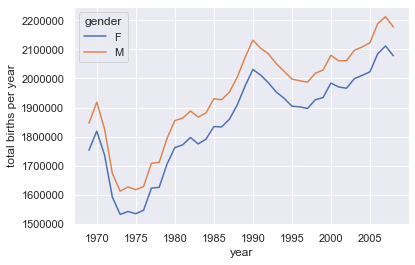

In [44]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

By eye, it appears that over the past 50 years male births
have outnumbered female births by around 5%.

### Time series data
###  sigma-clipping operation

### Vectorized String Operations

In [45]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]


['Peter', 'Paul', 'Mary', 'Guido']

In [46]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Does not work for none type object

In [48]:
ser = pd.Series(data)
ser

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [49]:
ser.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### "ser.str.<tab"

In [50]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                     'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [51]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [52]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [56]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [57]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [58]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [60]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D']})

full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [61]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


The get_dummies() routine lets you quickly split out these indicator variables into a
DataFrame

These vectorized string operations become most useful in the process of cleaning up
messy, real-world data

### Working with Time Series

In [2]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [3]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [16]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [7]:
date.strftime('%A')

'Saturday'

In [10]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index )
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [11]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3),np.datetime64('2015-11-04'), '4th of July, 2015',
                         '2015-Jul-6', '07-07-2015', '20150708'])
dates


DatetimeIndex(['2015-07-03', '2015-11-04', '2015-07-04', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [20]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-11-04', '2015-07-04', '2015-07-06',
             '2015-07-07', '2015-07-08'],
            dtype='period[D]', freq='D')

In [21]:
dates - dates[0]

TimedeltaIndex(['0 days', '124 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [22]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
 pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [25]:
pd.date_range('2015-07-03', periods=8, freq='M')


DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [26]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [ ]:
## conda install pandas-datareader

knows how to import
financial data from a number of available sources, including Yahoo finance, Google
Finance, and others. Here we will load Google’s closing price history:

In [33]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


Text(0, 0.5, 'closing price')

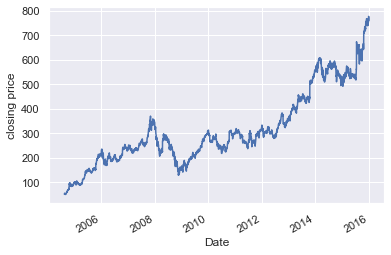

In [34]:
goog = goog['Close']
goog.plot()
plt.ylabel('closing price')

 The primary difference between the two is that resample() is fundamentally
a data aggregation, while asfreq() is fundamentally a data selection.

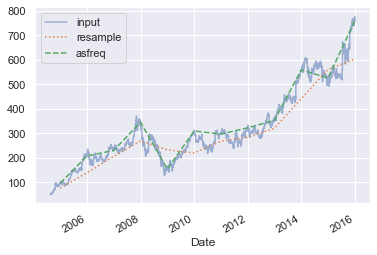

In [35]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

### High-Performance Pandas: eval() and query()

In [38]:
rng = np.random.RandomState(42)
x = rng.rand(int(1E6))
y = rng.rand(int(1E6))
%timeit x + y


2.87 ms ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
mask = (x > 0.5) & (y < 0.5)
mask

array([False,  True,  True, ..., False, False, False])

In [40]:
%timeit (x > 0.5) & (y < 0.5)

1.94 ms ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
import numexpr


In [42]:
%timeit numexpr.evaluate('(x > 0.5) & (y < 0.5)')

1.61 ms ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The benefit here is that Numexpr evaluates the expression in a way that does not use
full-sized temporary arrays, and thus can be much more efficient than NumPy, espe‐
cially for large arrays.

In [43]:
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)


True

Both gives the same result

### Pandas eval()

In [44]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))


In [45]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211


In [46]:
df1.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
99995,0.071979,0.439323,0.188588,0.586705,0.640611,0.662409,0.318503,0.600419,0.609742,0.390592,...,0.122887,0.491140,0.032855,0.567250,0.428673,0.421092,0.021024,0.398596,0.405897,0.869783
99996,0.313411,0.010490,0.469216,0.600825,0.451085,0.496918,0.983128,0.422056,0.719077,0.045588,...,0.072444,0.715574,0.300257,0.087290,0.130703,0.549202,0.287877,0.589258,0.516884,0.254370
99997,0.560873,0.647396,0.043068,0.282439,0.042950,0.346690,0.954034,0.603182,0.447768,0.888498,...,0.880079,0.508377,0.442052,0.621332,0.314942,0.131085,0.697310,0.111705,0.397560,0.988347
99998,0.710115,0.067999,0.611329,0.136199,0.054724,0.018160,0.911428,0.762005,0.245312,0.891027,...,0.249632,0.894231,0.342761,0.844330,0.659797,0.835561,0.117920,0.211202,0.931760,0.296913
99999,0.116834,0.461155,0.754556,0.250272,0.864631,0.588966,0.358260,0.655541,0.946702,0.145819,...,0.298095,0.496018,0.990856,0.368719,0.837910,0.244971,0.061637,0.933295,0.245149,0.388890


In [47]:
%timeit df1 + df2 + df3 + df4

87.4 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit pd.eval('df1 + df2 + df3 + df4')

45.8 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
np.allclose(df1 + df2 + df3 + df4, pd.eval('df1 + df2 + df3 + df4'))

True

### operations supported by pd.eval()

In [50]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))


In [52]:
## Arithmatic operations

result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [53]:
## Comparison operations

result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [54]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [55]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [56]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

The DataFrame.eval() method allows much more succinct evaluation of expressions
with the columns:

In [57]:
df.eval('D = (A + B) / C', inplace=True) # we can add column
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [58]:
df.eval('D = 0', inplace=True) # we can modify column
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,0
1,0.069087,0.235615,0.154374,0
2,0.677945,0.433839,0.652324,0
3,0.264038,0.808055,0.347197,0
4,0.589161,0.252418,0.557789,0


In [60]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)


True

In [61]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

Note that the query() method also
accepts the @ flag to mark local variables:

In [152]:
#importing data

df = pd.read_csv('Data/pokemon_data.csv')
df

# for excel files
# df_xlsx = pd.read_excel('pokemon_data.xlsx')

# for txt files
# df = pd.read_csv('pokemon_data.txt', delimiter='\t')


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [103]:
df.head(5) # to read top n data entires

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [104]:
df.tail(5) # to read bottom n data entires

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


### Reading Data features

In [105]:
## REading columns
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [106]:
df['HP']

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

In [107]:
df[['Name' ,'Type 1' , 'HP']] # change to list for multiple

,Name,Type 1,HP
0,Bulbasaur,Grass,45
1,Ivysaur,Grass,60
2,Venusaur,Grass,80
3,VenusaurMega Venusaur,Grass,80
4,Charmander,Fire,39
...,...,...,...
795,Diancie,Rock,50
796,DiancieMega Diancie,Rock,50
797,HoopaHoopa Confined,Psychic,80
798,HoopaHoopa Unbound,Psychic,80


In [108]:
## Reading Rows

In [109]:
df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [110]:
## use iloc function : integer location

print(df.iloc[1])

#                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object


In [111]:
df.iloc[0:4]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [112]:
## to read specific loaction

print(df.iloc[2,1])
print(df.iloc[1,6])

Venusaur
63


In [113]:
## to iterate through rows

for index,row in df.iterrows():
    print(index,row)
    
    

0 #                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object
1 #                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object
2 #                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object
3 #                                 3
Name          VenusaurMega Venusaur
Type 1                 

Name: 192, dtype: object
193 #                  179
Name            Mareep
Type 1        Electric
Type 2             NaN
HP                  55
Attack              40
Defense             40
Sp. Atk             65
Sp. Def             45
Speed               35
Generation           2
Legendary        False
Name: 193, dtype: object
194 #                  180
Name           Flaaffy
Type 1        Electric
Type 2             NaN
HP                  70
Attack              55
Defense             55
Sp. Atk             80
Sp. Def             60
Speed               45
Generation           2
Legendary        False
Name: 194, dtype: object
195 #                  181
Name          Ampharos
Type 1        Electric
Type 2             NaN
HP                  90
Attack              75
Defense             85
Sp. Atk            115
Sp. Def             90
Speed               55
Generation           2
Legendary        False
Name: 195, dtype: object
196 #                               181
Name          Amphar

Name: 418, dtype: object
419 #                 381
Name           Latios
Type 1         Dragon
Type 2        Psychic
HP                 80
Attack             90
Defense            80
Sp. Atk           130
Sp. Def           110
Speed             110
Generation          3
Legendary        True
Name: 419, dtype: object
420 #                           381
Name          LatiosMega Latios
Type 1                   Dragon
Type 2                  Psychic
HP                           80
Attack                      130
Defense                     100
Sp. Atk                     160
Sp. Def                     120
Speed                       110
Generation                    3
Legendary                  True
Name: 420, dtype: object
421 #                382
Name          Kyogre
Type 1         Water
Type 2           NaN
HP               100
Attack           100
Defense           90
Sp. Atk          150
Sp. Def          140
Speed             90
Generation         3
Legendary       True
Name: 421, dt

Name: 606, dtype: object
607 #                    547
Name          Whimsicott
Type 1             Grass
Type 2             Fairy
HP                    60
Attack                67
Defense               85
Sp. Atk               77
Sp. Def               75
Speed                116
Generation             5
Legendary          False
Name: 607, dtype: object
608 #                 548
Name          Petilil
Type 1          Grass
Type 2            NaN
HP                 45
Attack             35
Defense            50
Sp. Atk            70
Sp. Def            50
Speed              30
Generation          5
Legendary       False
Name: 608, dtype: object
609 #                   549
Name          Lilligant
Type 1            Grass
Type 2              NaN
HP                   70
Attack               60
Defense              75
Sp. Atk             110
Sp. Def              75
Speed                90
Generation            5
Legendary         False
Name: 609, dtype: object
610 #                  550
Name     

In [114]:
for index,row in df.iterrows():
    print(index,row['Name'])

0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise
12 BlastoiseMega Blastoise
13 Caterpie
14 Metapod
15 Butterfree
16 Weedle
17 Kakuna
18 Beedrill
19 BeedrillMega Beedrill
20 Pidgey
21 Pidgeotto
22 Pidgeot
23 PidgeotMega Pidgeot
24 Rattata
25 Raticate
26 Spearow
27 Fearow
28 Ekans
29 Arbok
30 Pikachu
31 Raichu
32 Sandshrew
33 Sandslash
34 Nidoran (Female)
35 Nidorina
36 Nidoqueen
37 Nidoran (Male)
38 Nidorino
39 Nidoking
40 Clefairy
41 Clefable
42 Vulpix
43 Ninetales
44 Jigglypuff
45 Wigglytuff
46 Zubat
47 Golbat
48 Oddish
49 Gloom
50 Vileplume
51 Paras
52 Parasect
53 Venonat
54 Venomoth
55 Diglett
56 Dugtrio
57 Meowth
58 Persian
59 Psyduck
60 Golduck
61 Mankey
62 Primeape
63 Growlithe
64 Arcanine
65 Poliwag
66 Poliwhirl
67 Poliwrath
68 Abra
69 Kadabra
70 Alakazam
71 AlakazamMega Alakazam
72 Machop
73 Machoke
74 Machamp
75 Bellsprout
76 Weepinbell
77 

666 Elgyem
667 Beheeyem
668 Litwick
669 Lampent
670 Chandelure
671 Axew
672 Fraxure
673 Haxorus
674 Cubchoo
675 Beartic
676 Cryogonal
677 Shelmet
678 Accelgor
679 Stunfisk
680 Mienfoo
681 Mienshao
682 Druddigon
683 Golett
684 Golurk
685 Pawniard
686 Bisharp
687 Bouffalant
688 Rufflet
689 Braviary
690 Vullaby
691 Mandibuzz
692 Heatmor
693 Durant
694 Deino
695 Zweilous
696 Hydreigon
697 Larvesta
698 Volcarona
699 Cobalion
700 Terrakion
701 Virizion
702 TornadusIncarnate Forme
703 TornadusTherian Forme
704 ThundurusIncarnate Forme
705 ThundurusTherian Forme
706 Reshiram
707 Zekrom
708 LandorusIncarnate Forme
709 LandorusTherian Forme
710 Kyurem
711 KyuremBlack Kyurem
712 KyuremWhite Kyurem
713 KeldeoOrdinary Forme
714 KeldeoResolute Forme
715 MeloettaAria Forme
716 MeloettaPirouette Forme
717 Genesect
718 Chespin
719 Quilladin
720 Chesnaught
721 Fennekin
722 Braixen
723 Delphox
724 Froakie
725 Frogadier
726 Greninja
727 Bunnelby
728 Diggersby
729 Fletchling
730 Fletchinder
731 Talonflame


In [115]:
## find specific row

df.loc[df['Type 1'] == "Fire"]
#df.loc[df['Type 1'] == "Grass"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False


## Sorting/Describing Data

In [116]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [117]:
df.sort_values('Name' , ascending = False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
695,634,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False
46,41,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
631,570,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
632,571,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,359,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False
392,359,Absol,Dark,NaN,65,130,60,75,60,75,3,False
68,63,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
511,460,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False


In [118]:
df.sort_values(['Type 1', 'HP'], ascending=[1,0]) # high HP type 1 asc


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
520,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False
231,214,Heracross,Bug,Fighting,80,125,75,40,95,85,2,False
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
678,617,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
106,98,Krabby,Water,NaN,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,30,40,70,70,25,60,1,False
129,120,Staryu,Water,NaN,30,45,55,70,55,85,1,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False


## Making changes to the data

In [119]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [120]:
## add column total

df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df.head(6)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405


In [121]:
## doublechecking
45+49+49+65+65+45

318

In [122]:
## to drop a column
df = df.drop(columns=['Total'])
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [123]:
## another way
## all rows with 4 to 9 cols (10 is exclusive) add horizontally
df['Total'] = df.iloc[:, 4:10].sum(axis=1) 
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [124]:
## made list of columns
cols = list(df.columns.values)
cols

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total']

In [125]:
# Reorder data for better visualization

mydf = df[cols[0:4] + [cols[-1]] + cols[4:12]]
mydf.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Saving our Data (Exporting into Desired Format)

In [126]:
## Save modified data to use further

mydf.to_csv('Data/modified.csv' , index = False) # for not saving index

# similarly

#df.to_excel('modified.xlsx', index=False)

#df.to_csv('modified.txt', index=False, sep='\t')



## Filtering Data

In [127]:
df.loc[df['Type 1'] == 'Grass']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False,313
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False,405
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False,530
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False,350


In [128]:
df.loc[(df['Type 1'] == 'Grass' ) & (df['Type 1'] == 'Grass')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False,313
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False,405
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False,530
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False,350


In [129]:
df.loc[(df['Type 1'] == 'Grass' ) & (df['Type 1'] == 'Grass')]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,650,Chespin,Grass,NaN,56,61,65,48,45,38,6,False,313
719,651,Quilladin,Grass,NaN,61,78,95,56,58,57,6,False,405
720,652,Chesnaught,Grass,Fighting,88,107,122,74,75,64,6,False,530
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False,350


In [153]:
new_df = df.loc[(df['Type 1'] == 'Grass' ) & (df['Type 2'] == 'Poison') & (df['HP'] > 50 )]
new_df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
49,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False
50,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
76,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False
77,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
452,407,Roserade,Grass,Poison,60,70,65,125,105,90,4,False
651,590,Foongus,Grass,Poison,69,55,45,55,55,15,5,False
652,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False


In [65]:
## To reset index
## drop = True to drop old index
## inplace = True otherwise write new_df = new_df.reset......

In [131]:

new_df.reset_index(drop = True , inplace = True)
new_df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
2,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
3,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False,395
4,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False,490
5,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False,390
6,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490
7,407,Roserade,Grass,Poison,60,70,65,125,105,90,4,False,515
8,590,Foongus,Grass,Poison,69,55,45,55,55,15,5,False,294
9,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,464


In [132]:
df.loc[df['Name'].str.contains('Mega')]
# df.loc[~ df['Name'].str.contains('Mega')] negation

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579
71,65,AlakazamMega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False,590
87,80,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,590
102,94,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600
124,115,KangaskhanMega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False,590


### Using REGEX

In [133]:
df.loc[df['Type 1'].str.contains('Fire|Grass' , regex = True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,667,Litleo,Fire,Normal,62,50,58,73,54,72,6,False,369
736,668,Pyroar,Fire,Normal,86,68,72,109,66,106,6,False,507
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False,350
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False,531


In [134]:
df.loc[df['Type 1'].str.contains('fire|grass' ,flags = re.I , regex = True)] # to ignore case

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,667,Litleo,Fire,Normal,62,50,58,73,54,72,6,False,369
736,668,Pyroar,Fire,Normal,86,68,72,109,66,106,6,False,507
740,672,Skiddo,Grass,NaN,66,65,48,62,57,52,6,False,350
741,673,Gogoat,Grass,NaN,123,100,62,97,81,68,6,False,531


In [135]:
## to get name start with pi(^) after then anything from atoz [a-z] and * means 0 or more

In [154]:
df.loc[df['Name'].str.contains('^pi[a-z]*' ,flags = re.I , regex = True)] # to ignore case

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
20,16,Pidgey,Normal,Flying,40,45,40,35,35,56,1,False
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
30,25,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False
136,127,Pinsir,Bug,NaN,65,125,100,55,70,85,1,False
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False
186,172,Pichu,Electric,NaN,20,40,15,35,35,60,2,False
219,204,Pineco,Bug,NaN,50,65,90,35,35,15,2,False
239,221,Piloswine,Ice,Ground,100,100,80,60,60,50,2,False



## Conditional Changes

In [137]:
df.loc[df['Type 1'] == 'Fire' , 'Type 1'] = 'Flamer'
df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Flamer,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Flamer,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Flamer,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Flamer,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Flamer,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


In [149]:
## Again change to Fire

df.loc[df['Type 1'] == 'Flamer' , 'Type 1'] = 'Fire'
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [139]:
new_df.loc[new_df['Total'] > 500, ['Generation','Legendary']] = ['100', 'Unknown']

new_df.head(10)

C:\Users\sahir\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,100,Unknown,525
2,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,100,Unknown,625
3,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False,395
4,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False,490
5,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False,390
6,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490
7,407,Roserade,Grass,Poison,60,70,65,125,105,90,100,Unknown,515
8,590,Foongus,Grass,Poison,69,55,45,55,55,15,5,False,294
9,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False,464


In [155]:
## REloading original new_df

new_df = df.loc[(df['Type 1'] == 'Grass' ) & (df['Type 2'] == 'Poison') & (df['HP'] > 50 )]
new_df.reset_index(drop = True , inplace = True)
new_df.head(20)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
2,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
3,44,Gloom,Grass,Poison,60,65,70,85,75,40,1,False
4,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
5,70,Weepinbell,Grass,Poison,65,90,50,85,45,55,1,False
6,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
7,407,Roserade,Grass,Poison,60,70,65,125,105,90,4,False
8,590,Foongus,Grass,Poison,69,55,45,55,55,15,5,False
9,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False


## Aggregate Statistics (Groupby)


In [141]:
## group by type1 with highest mean defense 
df.groupby(['Type 1']).mean().sort_values('Defense' , ascending = 0)

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,
Steel,442.851852,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,487.703704
Rock,392.727273,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,453.750000
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,550.531250
Ground,356.281250,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,0.125000,437.500000
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,439.562500
Water,303.089286,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143,0.035714,430.455357
Ice,423.541667,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667,0.083333,433.458333
Grass,344.871429,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143,0.042857,421.142857
Bug,334.492754,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,378.927536


In [142]:

df.groupby(['Type 1']).count()

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


In [143]:
## Adding new column count with initial value 1
df['count'] = 1
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,count
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,1
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,1
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,1


In [144]:
df.groupby(['Type 1']).count()['count']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: count, dtype: int64

In [145]:
## group by multiple parameters
type_df = df.groupby(['Type 1', 'Type 2']).count()['count']
type_df.head(50) 

Type 1    Type 2  
Bug       Electric     2
          Fighting     2
          Fire         2
          Flying      14
          Ghost        1
          Grass        6
          Ground       2
          Poison      12
          Rock         3
          Steel        7
          Water        1
Dark      Dragon       3
          Fighting     2
          Fire         3
          Flying       5
          Ghost        2
          Ice          2
          Psychic      2
          Steel        2
Dragon    Electric     1
          Fairy        1
          Fire         1
          Flying       6
          Ground       5
          Ice          3
          Psychic      4
Electric  Dragon       1
          Fairy        1
          Fire         1
          Flying       5
          Ghost        1
          Grass        1
          Ice          1
          Normal       2
          Steel        3
          Water        1
Fairy     Flying       2
Fighting  Dark         1
          Flying       1
      

## Working with large amounts of data



In [146]:


for df in pd.read_csv('Data/modified.csv', chunksize=5):
    print("CHUNK DF")
    print(df)


CHUNK DF
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
CHUNK DF
   #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84    

CHUNK DF
       #        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
170  156     Quilava   Fire     NaN    405  58      64       58       80   
171  157  Typhlosion   Fire     NaN    534  78      84       78      109   
172  158    Totodile  Water     NaN    314  50      65       64       44   
173  159    Croconaw  Water     NaN    405  65      80       80       59   
174  160  Feraligatr  Water     NaN    530  85     105      100       79   

     Sp. Def  Speed  Generation  Legendary  
170       65     80           2      False  
171       85    100           2      False  
172       48     43           2      False  
173       63     58           2      False  
174       83     78           2      False  
CHUNK DF
       #      Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
175  161   Sentret  Normal     NaN    215   35      46       34       35   
176  162    Furret  Normal     NaN    415   85      76       64       45   
177  163  Hoothoot  Normal 

CHUNK DF
       #     Name  Type 1   Type 2  Total  HP  Attack  Defense  Sp. Atk  \
375  343   Baltoy  Ground  Psychic    300  40      40       55       40   
376  344  Claydol  Ground  Psychic    500  60      70      105       70   
377  345   Lileep    Rock    Grass    355  66      41       77       61   
378  346  Cradily    Rock    Grass    495  86      81       97       81   
379  347  Anorith    Rock      Bug    355  45      95       50       40   

     Sp. Def  Speed  Generation  Legendary  
375       70     55           3      False  
376      120     75           3      False  
377       87     23           3      False  
378      107     43           3      False  
379       50     75           3      False  
CHUNK DF
       #      Name  Type 1 Type 2  Total  HP  Attack  Defense  Sp. Atk  \
380  348   Armaldo    Rock    Bug    495  75     125      100       70   
381  349    Feebas   Water    NaN    200  20      15       20       10   
382  350   Milotic   Water    NaN    54

CHUNK DF
       #      Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
570  511   Pansage  Grass     NaN    316  50      53       48       53   
571  512  Simisage  Grass     NaN    498  75      98       63       98   
572  513   Pansear   Fire     NaN    316  50      53       48       53   
573  514  Simisear   Fire     NaN    498  75      98       63       98   
574  515   Panpour  Water     NaN    316  50      53       48       53   

     Sp. Def  Speed  Generation  Legendary  
570       48     64           5      False  
571       63    101           5      False  
572       48     64           5      False  
573       63    101           5      False  
574       48     64           5      False  
CHUNK DF
       #       Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
575  516   Simipour    Water     NaN    498   75      98       63       98   
576  517      Munna  Psychic     NaN    292   76      25       45       67   
577  518   Musharna  Psychic     

       #       Name    Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
765  695  Heliolisk  Electric  Normal    481   62      55       52      109   
766  696     Tyrunt      Rock  Dragon    362   58      89       77       45   
767  697  Tyrantrum      Rock  Dragon    521   82     121      119       69   
768  698     Amaura      Rock     Ice    362   77      59       50       67   
769  699    Aurorus      Rock     Ice    521  123      77       72       99   

     Sp. Def  Speed  Generation  Legendary  
765       94    109           6      False  
766       45     48           6      False  
767       59     71           6      False  
768       63     46           6      False  
769       92     58           6      False  
CHUNK DF
       #      Name    Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
770  700   Sylveon     Fairy     NaN    525  95      65       65      110   
771  701  Hawlucha  Fighting  Flying    500  78      92       75       74   
772  702   Dede

In [147]:
# new ddata frame with same column names
chunk_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('Data/modified.csv', chunksize=5):
    
    results = df.groupby(['Type 1']).count()
    
    chunk_df = pd.concat([chunk_df, results])
    

chunk_df    





,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Fire,1,1,NaN,0,1,1,1,1,1,1,1,1,1
Grass,4,4,NaN,4,4,4,4,4,4,4,4,4,4
Fire,4,4,NaN,3,4,4,4,4,4,4,4,4,4
Water,1,1,NaN,0,1,1,1,1,1,1,1,1,1
Bug,2,2,NaN,0,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy,1,1,NaN,0,1,1,1,1,1,1,1,1,1
Flying,2,2,NaN,2,2,2,2,2,2,2,2,2,2
Fire,1,1,NaN,1,1,1,1,1,1,1,1,1,1
Psychic,2,2,NaN,2,2,2,2,2,2,2,2,2,2
